<a href="https://colab.research.google.com/github/Sukhpreet2001/Data_Science/blob/main/COVID_19_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()
file_name = 'country_wise_latest.csv'


Saving country_wise_latest.csv to country_wise_latest (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.read_csv(file_name)



In [ ]:
print(df.head())




  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

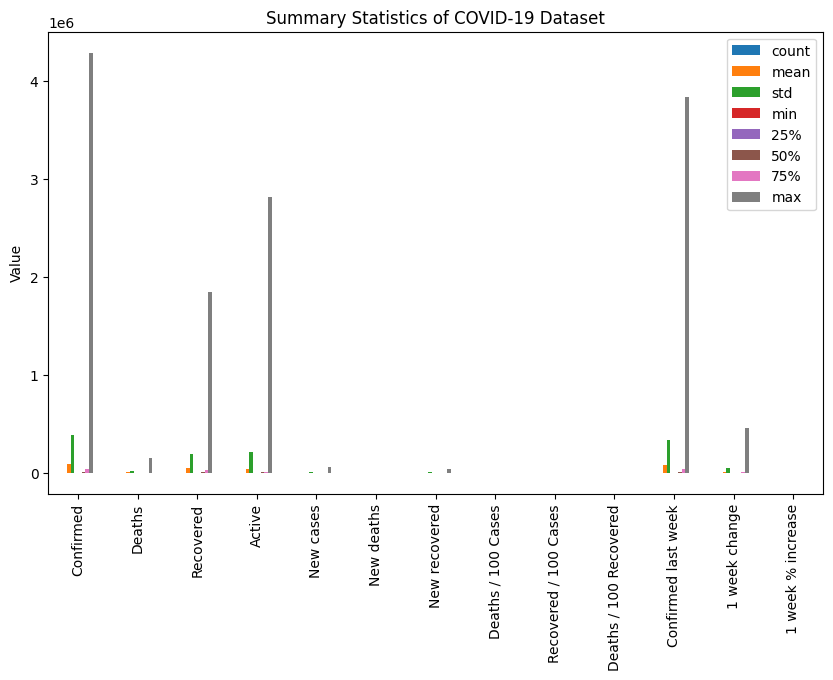

In [29]:
# Summary statistics of the dataset
summary_stats = df.describe()

# Plot the summary statistics
summary_stats.T.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics of COVID-19 Dataset')
plt.ylabel('Value')
plt.show()

In [30]:
# Group by 'Country/Region' and calculate the total confirmed, deaths, and recovered cases
grouped_data = df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [31]:
# Display the grouped data
print(grouped_data)

         Country/Region  Confirmed  Deaths  Recovered
0           Afghanistan      36263    1269      25198
1               Albania       4880     144       2745
2               Algeria      27973    1163      18837
3               Andorra        907      52        803
4                Angola        950      41        242
..                  ...        ...     ...        ...
182  West Bank and Gaza      10621      78       3752
183      Western Sahara         10       1          8
184               Yemen       1691     483        833
185              Zambia       4552     140       2815
186            Zimbabwe       2704      36        542

[187 rows x 4 columns]


In [28]:
# Select the top 20 major regions based on the total confirmed cases
top_regions = grouped_data.nlargest(20, 'Confirmed')

# Display the summary table
print(top_regions[['WHO Region', 'Confirmed', 'Deaths', 'Recovered']])

              WHO Region  Confirmed  Deaths  Recovered
1               Americas    8839286  342732    4468616
3                 Europe    3299523  211144    1993723
4        South-East Asia    1835297   41349    1156933
2  Eastern Mediterranean    1490744   38339    1201400
0                 Africa     723207   12223     440645
5        Western Pacific     292428    8249     206770
